# Project Smart ICT systems


## Introduction

For my project smart ICT systems i choose to do linear and polynomial regression and test this on a relevant problems that occurs in our life. In this situation i'll be testing it on stock market value of S&P 500 index based on the stock price of it's 4 most important companies, such as Nvidea,Apple,Microsoft and Amazon. 

The S&P 500, also known as the Standard & Poor's 500 Index, is a stock market index that measures the performance of 500 large publicly traded companies in the United States. It is one of the most widely followed and recognized benchmarks for the overall health and performance of the U.S. stock market. We will consider the closing prices of the stock market price each month, starting from january 2013 untill january 2023.

I will demonstrate and explain how I implented python code for linear regression with single variable, linear regression with multiple variables and polynomial regression. I will also talk about the conclusions and the differences between them at the end.

## Used libraries and created train/test sets


In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import sample
from sklearn.linear_model import LinearRegression

SP500_CSV = pd.read_csv("SP500.csv")
NVDA_CSV = pd.read_csv("NVDA.csv")

NVDA_values = NVDA_CSV.iloc[:, 4].values
Amount_Data_points = len(NVDA_values)

#Determine size of array by appending the amount of data points
array_size = []
for i in range(Amount_Data_points):
    array_size.append(i)
#Determine the train and test size
training_sets = int(Amount_Data_points*0.8)

test_sets = Amount_Data_points-training_sets

#Randomly picking samples from our array
random_training_samples = sample(array_size,training_sets)
#Appending other samples to our testing set
random_testing_indices = []
for i in array_size:
    if ((i in random_training_samples) == False):
        random_testing_indices.append(i)
print('Randomly picked samples:',random_testing_indices)
print('Train set size is:',training_sets)
print('test set size is:',test_sets)


Randomly picked samples: [1, 7, 14, 26, 29, 31, 32, 37, 41, 52, 54, 55, 60, 63, 67, 68, 83, 85, 88, 94, 105, 107, 115, 117, 120]
Train set size is: 96
test set size is: 25


## Linear regression, single variable

Linear regression is a fundamental and widely used statistical technique for modeling and analyzing relationships between variables. It is a powerful tool that allows us to understand how one variable, known as the dependent variable, changes with respect to another variable or set of variables, known as the independent variables.

In the case of simple linear regression, we consider only one independent variable to predict the dependent variable. The equation of the regression line can be expressed as:

y = b₀ + b₁x + ε

Where:

- y represents the dependent variable we want to predict.
- x represents the independent variable.
- b₀ is the y-intercept of the regression line, representing the value of y when x is zero.
- b₁ are the regression coefficients or weights that represent the relationship between each independent variable and the dependent variable.
- ε represents the error term or residual, which accounts for the variability in the data not explained by the linear relationship.

In our case we will try to find a function that fits with the following model : y=bx+a

To keep our residual to a minimum, we have to minimize the sum of the squared residuals(SSR).

We will be using the following formulas to find the function described above and to keep residual to a minimum
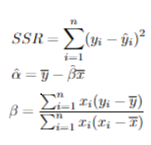

We will also determine the coefficient of determination to see if there is a strong correlation between the input and output with the following formula :

R² = 1 - (Σ(y_estimated - yi)² / Σ(y_mean - yi)²)

Below this cell you will find the python code needed to do a simple lineair regression on stock market value of S&P 500. In this case i will do it on the stock price of Nvidea. You can also change it to another stock prices such as Microsoft,Apple and Amazon. You just have to change the file name in the function we call to the desired file name.


In [10]:
def LinearRegressionSingleVariable(variable, output,random_training_samples):
    
    #Get our wanted data from our csv files and choose the correct column 0:4
    dataset_x = pd.read_csv(variable)
    dataset_y = pd.read_csv(output)
    
    x_values = dataset_x.iloc[:, 4].values
    y_values = dataset_y.iloc[:, 4].values

    #Returns the average of the array elements.
    x_mean = np.mean(x_values)
    y_mean = np.mean(y_values)

    #As mentioned above we will be using the formula: b = Σ(x_values - x_mean)(y_values-y_mean) / Σ(x_values-x_mean)²
    b_numerator = 0
    b_denominator = 0
    b = 0
    for i in random_training_samples:
        b_numerator += (x_values[i] - x_mean) * (y_values[i] - y_mean)
        b_denominator += (x_values[i] - x_mean) ** 2

    b = b_numerator / b_denominator

    a = y_mean - (b*x_mean)
    
    print('Our b = ' ,"%.3f" % b)
    print('Our a is = ', "%.3f" % a)
    print( 'Our function y = ',"%.3f" % b,'x +',"%.3f" % a)
    #As mentioned above we will be using the formula: R² = 1 - (Σ(y_estimated - yi)² / Σ(y_mean - yi)²)
    R_Coeff_Numerator = 0
    R_Coeff_Denominator = 0

    for i in random_training_samples:
        y_approx = a + b * x_values[i]
        R_Coeff_Numerator += (y_approx - y_values[i]) ** 2
        R_Coeff_Denominator += (y_mean - y_values[i]) ** 2
    R_squared = 1 - (R_Coeff_Numerator/R_Coeff_Denominator)
    print('The determination coefficient R² is',"%.3f" % R_squared)
    ################################ PLOTTING ############################################################ 

    #Max and min value of our plot
    x_max_value = np.max(x_values) + 15
    x_min_value = np.min(x_values) - 15

    # We can use linspace to return evenly spaced numbers over a specified interval.

    x = np.linspace(x_min_value, x_max_value, 100)
    y = a + b*x

    #Actual plot code
    plt.plot(x, y, color='r')
    plt.xlabel(dataset_x.columns[4])
    plt.ylabel(dataset_y.columns[4])
    plt.scatter(x_values, y_values, c='b')

    plt.title("Linear regression")
    plt.show()
    

    ################################ Testing with skycit library#############################################

    #define the test and training sets
    training_sets_x = []
    training_sets_y = []
    for i in random_training_samples:
        array = [0]
        training_sets_y.append(y_values[i])
        array[0] = x_values[i]
        training_sets_x.append(array)

    testing_set_x = []
    testing_set_y = []

    for i in random_testing_indices:
        array = [0]
        testing_set_y.append(y_values[i])
        array[0] = x_values[i]
        testing_set_x.append(array)

    Skycit_Lin_Reg = LinearRegression().fit(training_sets_x, training_sets_y)
    print('Skycit library results:')
    print('Our a is: {}'.format("%.3f" % Skycit_Lin_Reg.coef_))
    print('Our b is: {}'.format("%.3f" % Skycit_Lin_Reg.intercept_))

    print('The determination coefficient R² is: {}'.format("%.3f" % Skycit_Lin_Reg.score(training_sets_x, training_sets_y)))
    ################################ PLOTTING skycit ############################################################ 
    x = np.linspace(x_min_value, x_max_value, 100)
    y = Skycit_Lin_Reg.intercept_ + Skycit_Lin_Reg.coef_*x

    #Actual plot code
    plt.plot(x, y, color='r')
    plt.scatter(x_values, y_values, c='b')
    plt.xlabel(dataset_x.columns[4])
    plt.ylabel(dataset_y.columns[4])
    plt.title("Linear regression with skycit library")
    plt.show()


Our b =  11.112
Our a is =  2018.398
Our function y =  11.112 x + 2018.398
The determination coefficient R² is 0.902


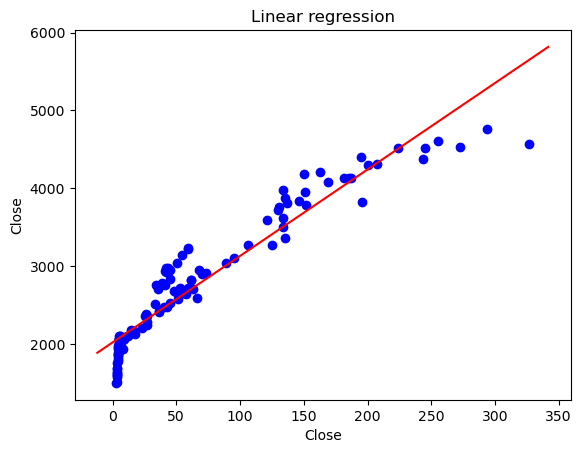

Skycit library results:
Our a is: 11.115
Our b is: 2028.497
The determination coefficient R² is: 0.902


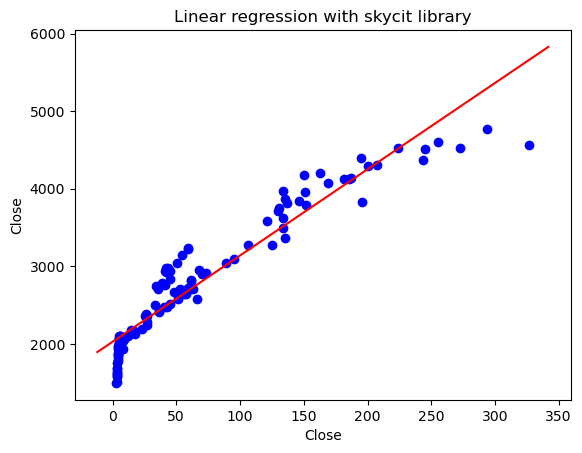

In [11]:
LinearRegressionSingleVariable("NVDA.csv", "SP500.csv",random_training_samples)

# Linear regression, Multiple variable

In the case of multiple variable linear regression the equation of the regression line will look like:

y = 𝑓(𝑥₁, 𝑥₂,...,𝑥ᵣ) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂+ ⋯ +𝑏ᵣ𝑥ᵣ + ε

where:
- y represents the dependent variable we want to predict.
- x represents the independent variable.
- b₀ is the y-intercept of the regression line, representing the value of y when x is zero.
- b1, b2, ..., bn are the regression coefficients or weights that represent the relationship between each independent variable and the dependent variable.
- ε represents the error term or residual, which accounts for the variability in the data not explained by the linear relationship.

To make things easier ill be demonstrating linear regression with only 3 variables. We will be using the following formulas to find the linear regression line for multiple variables:
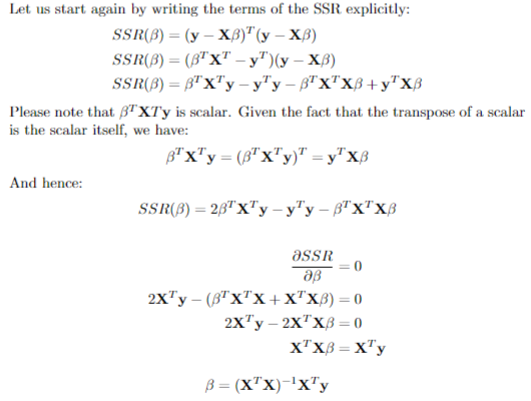


Below this cell you will find the python code needed to do a  lineair regression with multiple variables on stock market value of S&P 500






In [12]:
def LinearRegressionMultipleVariables(variable1, variable2, variable3, output,random_training_samples):
    dataset_x1 = pd.read_csv(variable1)
    dataset_x2 = pd.read_csv(variable2)
    dataset_x3 = pd.read_csv(variable3)
    dataset_y = pd.read_csv(output)

    x1_values = dataset_x1.iloc[:, 4].values
    x2_values = dataset_x2.iloc[:, 4].values
    x3_values = dataset_x3.iloc[:, 4].values
    y_values = dataset_y.iloc[:, 4].values

    #Fill matrix with zeros,(rows,columns)  
    training_sets_x = np.ones((training_sets, 4))

    #The values of the first column stay "1" and is used for b0, the other columns are updated with the actual parameters values and are used for b1...bp-1
    training_sets_x[:,1] = [dataset_x1.iloc[:, 4].values[i] for i in random_training_samples]
    training_sets_x[:,2] = [dataset_x2.iloc[:, 4].values[i] for i in random_training_samples]
    training_sets_x[:,3] = [dataset_x3.iloc[:, 4].values[i] for i in random_training_samples]

    #Create array of y training set
    training_sets_y = np.zeros(training_sets)
    training_sets_y[:] = [dataset_y.iloc[:, 4].values[i] for i in random_training_samples]
    
    #As mentioned above we will be using the formula: B = (X^T X)^-1 X^T y
    b = np.dot(np.dot(np.linalg.inv(np.dot(training_sets_x.T, training_sets_x)), training_sets_x.T), training_sets_y)
    
    ################################ Testing with skycit library#############################################
    Skycit_Lin_Reg = LinearRegression().fit(training_sets_x, training_sets_y)
    W = Skycit_Lin_Reg.coef_[1:4]
    print ('Our b are: ', b)
    print('Our function y=', "%.3f" % b[0], '+', "%.3f" % b[1], '* Nvidea price +', "%.3f" % b[2], '* Apple price +', "%.3f" % b[3] , '* Amazon price')

    print('\n','Skycit library results:')
    print('Our coeffiecients are:',W)
    print('Our b is: {}'.format("%.3f" %Skycit_Lin_Reg.intercept_), '\n')
    print('Our function y=', "%.3f" %Skycit_Lin_Reg.intercept_, '+', "%.3f" % W[0], '*Nvidea price +', "%.3f" % W[1], '* Apple price +', "%.3f" % W[2] , '* Amazon price')

In [13]:
LinearRegressionMultipleVariables('NVDA.csv','AAPL.csv', 'AMZN.csv', 'SP500.csv', random_training_samples)

Our b are:  [1676.00792947    2.52736706    7.83688146    5.61969178]
Our function y= 1676.008 + 2.527 * Nvidea price + 7.837 * Apple price + 5.620 * Amazon price

 Skycit library results:
Our coeffiecients are: [2.52736706 7.83688146 5.61969178]
Our b is: 1676.008 

Our function y= 1676.008 + 2.527 *Nvidea price + 7.837 * Apple price + 5.620 * Amazon price


# Polynomial regression,single variable

Polynomial regression allows for more complex, nonlinear relationships.
In the case of polynomial regression with Multiple variable the equation of the regression line will look like:

y = b0 + b1X + b2X^2 + ... + bn*X^n + ε



Below this cell you will find the python code needed to do a polynomial regression on stock market value of S&P 500

In [14]:
def ThirdOrderPolynomialRegression(variable,output,random_training_samples):
    dataset_x = pd.read_csv(variable)
    dataset_y = pd.read_csv(output)

    x_values = dataset_x.iloc[:, 4].values
    y_values = dataset_y.iloc[:, 4].values

    #Fill matrix with zeros,(rows,columns)  
    training_sets_x = np.ones((training_sets, 4))

    #The values of the column 0 stay "1" and is used for b0,
    #the other columns are updated with the actual parameters values and are used for b1...bp-1
    #Column 1 is x
    training_sets_x[:,1] = [dataset_x.iloc[:, 4].values[i] for i in random_training_samples]

    #Column 2 is x²
    training_sets_x[:,2] = [dataset_x.iloc[:, 4].values[i] ** 2 for i in random_training_samples]

    #Column 3 is x³
    training_sets_x[:,3] = [dataset_x.iloc[:, 4].values[i] ** 3 for i in random_training_samples]

    #Create array of y training set
    training_sets_y = np.zeros(training_sets)
    training_sets_y[:] = [dataset_y.iloc[:, 4].values[i] for i in random_training_samples]
    
    #we will be using the formula:B = (X^T X)^-1 X^T y
    
    b = np.dot(np.dot(np.linalg.inv(np.dot(training_sets_x.T, training_sets_x)), training_sets_x.T), training_sets_y)

    #Define min and max limits of plot
    x_max_value = np.max(x_values)
    x_min_value = np.min(x_values)

    # linspace since this is a digital implementation
    x = np.linspace(x_min_value, x_max_value, 100)
    y = b[0] + b[1]*x + b[2]*(x**2) + b[3] * (x**3)
    
    print ('Our b are: ', b)
    print('Our function y =', "%.3f" % b[0], '+', "%.3f" % b[1], '* Nvidea', "%.3f" % b[2], '* (Nvidea)² +', "%.5f" % b[3] , '* (Nvidea)³')

    ################################ PLOTTING ############################################################ 
    #plotting regression line and data points
    plt.plot(x, y, color='r')
    plt.scatter(x_values, y_values, c='b')
    plt.xlabel(dataset_x.columns[4])
    plt.ylabel(dataset_y.columns[4])
    plt.title("Polynomial regression")
    plt.show()
    ################################ Testing with skycit library#############################################
    #define the test and training sets
    training_sets_x = []
    training_sets_y = []

    for i in random_training_samples:
        array = [0]
        training_sets_y.append(y_values[i])
        array[0] = x_values[i]
        training_sets_x.append(array)

    from sklearn.preprocessing import PolynomialFeatures
    poly_regr = PolynomialFeatures(degree = 3)
    x_polynomial = poly_regr.fit_transform(training_sets_x)
    Skycit_Lin_Reg = LinearRegression()
    Skycit_Lin_Reg.fit(x_polynomial, training_sets_y)

    W = Skycit_Lin_Reg.coef_[1:4]
    print('Skycit library results')
    print('Our polynomial coefficients are:',W)
    print('Our b is: {}'.format("%.3f" %Skycit_Lin_Reg.intercept_), '\n')

   
    ################################ PLOTTING ############################################################ 
    x_smoother = np.arange(np.min(training_sets_x), np.max(training_sets_x), 0.1)
    #Reshape to get matrix
    x_smoother = x_smoother.reshape((len(x_smoother), 1))
    plt.plot(x_smoother, Skycit_Lin_Reg.predict(poly_regr.fit_transform(x_smoother)), color = 'r')
    plt.scatter(training_sets_x, training_sets_y, color = 'b')
    plt.xlabel('Apple Stock price')
    plt.ylabel('S&P 500 stock price')
    plt.title("Polynomial regression with skycit library")
    plt.show()

Our b are:  [ 1.82312185e+03  2.10265177e+01 -5.64112004e-02  5.72878604e-05]
Our function y = 1823.122 + 21.027 * Nvidea -0.056 * (Nvidea)² + 0.00006 * (Nvidea)³


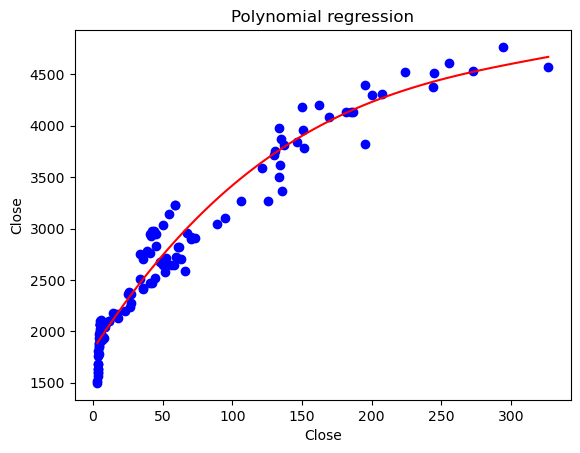

Skycit library results
Our polynomial coefficients are: [ 2.10265177e+01 -5.64112004e-02  5.72878604e-05]
Our b is: 1823.122 



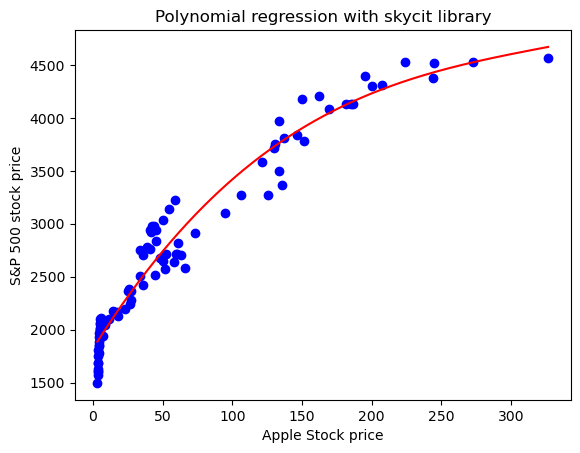

In [15]:
    ThirdOrderPolynomialRegression('NVDA.csv', 'SP500.csv', random_training_samples)



# Conclusion

### Linear regression, single variable

We can observe that the method we used has similarly the same results as the skycit library. So we can conclude that our used method is correct. In addition, we can also conclude that this model is not suitable to use for stock market analysis, since the regression line starts with a negative price and thus this is not possible. It is also possible that we are underfitting with this model so it is not convenient.

### Linear regression, multiple variable 

This method also gives the same results as the skycit library, the method we used is correct. The conlusion are same as single variable this model might be underfitting of the reality.

### Polynomial regression, single variable

We can see that our method used is correct. This method also has a low interception value compared to other methods used. So we can say that this method is precise for estimating S&P 500 index. But there might be downsides to this by using 1 input. It is possible that the method we used is underfitting the model.